# Overview of qubit states troughout a quantum circuit

This overview shows how a quantum circuit influences the state vector of a qubit troughout its application. The idea is to get a better understanding of qubits and their manipulation trough circuits. 

In [26]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_state_qsphere
from qiskit import *
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import QasmSimulator
import qiskit.quantum_info as qi
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import numpy as np

import warnings
warnings.simplefilter('ignore')

### Standard qubits

To start this write up, we will first take a look at the most simple of qubit states.

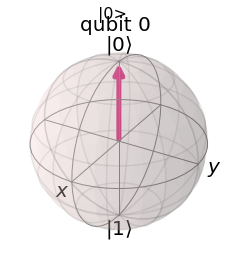

In [3]:
circuit = QuantumCircuit(1)
state = Statevector.from_instruction(circuit)
plot_bloch_multivector(state, title="|0>", reverse_bits=False)

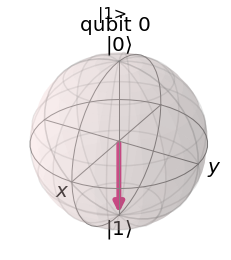

In [4]:
circuit = QuantumCircuit(1)
circuit.x(0)
state = Statevector.from_instruction(circuit)
plot_bloch_multivector(state, title="|1>", reverse_bits=False)

As we can see we flip, using the X gate, around the X axis. The arrow points directly on the Z-axis. This means we have to change the pointing direction to be able to visualize the rotation.

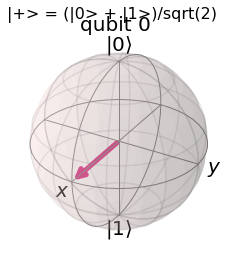

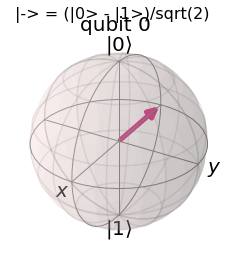

In [5]:
circuit = QuantumCircuit(1)
circuit.h(0)
state = Statevector.from_instruction(circuit)
display(plot_bloch_multivector(state, title="|+> = (|0> + |1>)/sqrt(2)", reverse_bits=False))
circuit.z(0)
state = Statevector.from_instruction(circuit)
display(plot_bloch_multivector(state, title="|-> = (|0> - |1>)/sqrt(2)", reverse_bits=False))

The same applies to the Y gate. As we can see on the graphs, the rotation using Y results in the same superposition as the one in the Z gate. Whilst the rotation itself isn't dont the same way, as it amounts to a flip (180°), it ends up in the same position.

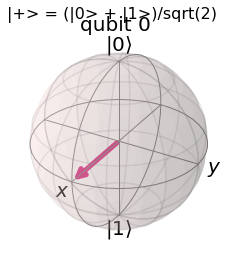

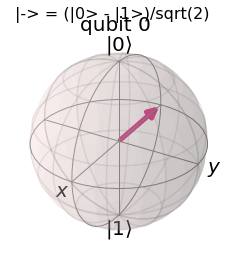

In [6]:
circuit = QuantumCircuit(1)
circuit.h(0)
state = Statevector.from_instruction(circuit)
display(plot_bloch_multivector(state, title="|+> = (|0> + |1>)/sqrt(2)", reverse_bits=False))
circuit.y(0)
state = Statevector.from_instruction(circuit)
display(plot_bloch_multivector(state, title="|-> = (|0> - |1>)/sqrt(2)", reverse_bits=False))


To further show how the rotation behaves exactly, we have to limit the rotation. To do this, we have to supply parameters to a parameterized circuit.

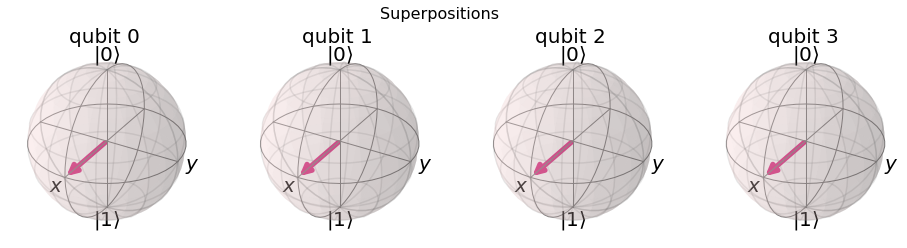

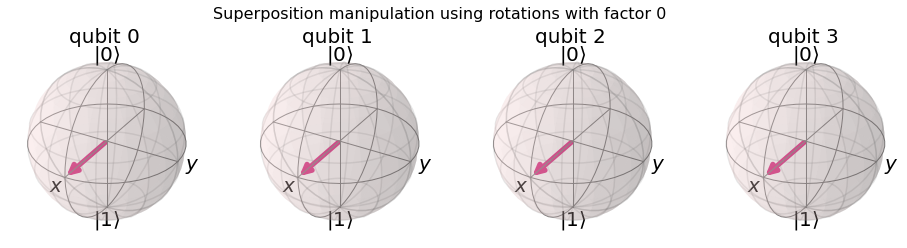

In [51]:
def create_circuit_for_rotations_with_parameters(parameters):
    circuit = QuantumCircuit(4,4)
    circuit.h(range(4))
    circuit.rz(Parameter('i_0'),0)
    circuit.rz(Parameter('i_1'),1)
    circuit.ry(Parameter('i_2'),2)
    circuit.ry(Parameter('i_3'),3)
    circuit = circuit.bind_parameters(parameters)
    return circuit

parameters = [0, 0, 0, 0]

circuit = QuantumCircuit(4)
circuit.h(range(4))
state = Statevector.from_instruction(circuit)
display(plot_bloch_multivector(state, title="Superpositions", reverse_bits=False))

circuit = create_circuit_for_rotations_with_parameters(parameters)
state = Statevector.from_instruction(circuit)
display(plot_bloch_multivector(state, title="Superposition manipulation using rotations with factor 0", reverse_bits=False))


As we see rotation gates with factor 0 do not change the value of the qubit. What about factor 1?

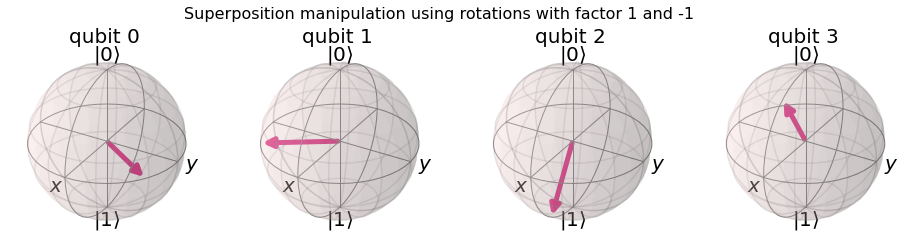

In [8]:
parameters = [1, -1, 1, -1]

circuit = create_circuit_for_rotations_with_parameters(parameters)
state = Statevector.from_instruction(circuit)
display(plot_bloch_multivector(state, title="Superposition manipulation using rotations with factor 1 and -1", reverse_bits=False))

As we can see we applied the Z and Y gates as follows:

- qubit 0: Z gate with factor 1
- qubit 1: Z gate with factor -1
- qubit 2: Y gate with factor 1
- qubit 3: Y gate with factor -1

This visualizes the rotation direction of the different gates in an understandable fashion. But how much rotation does the factor itself allow? Observations tell us that the factor 1/-1 to a rotation of roughly 45° translates.

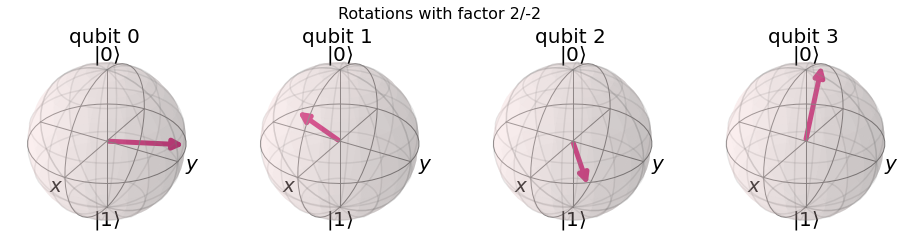

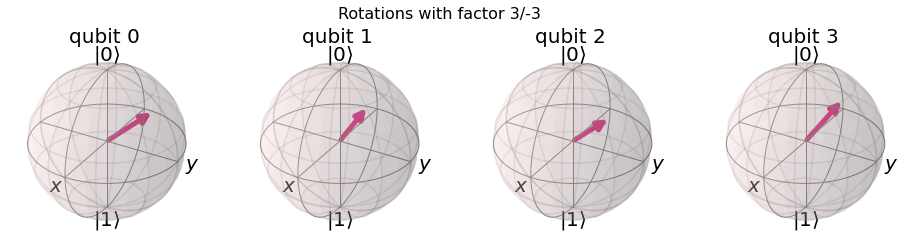

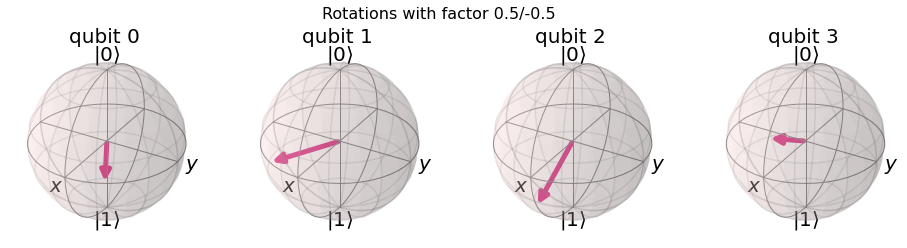

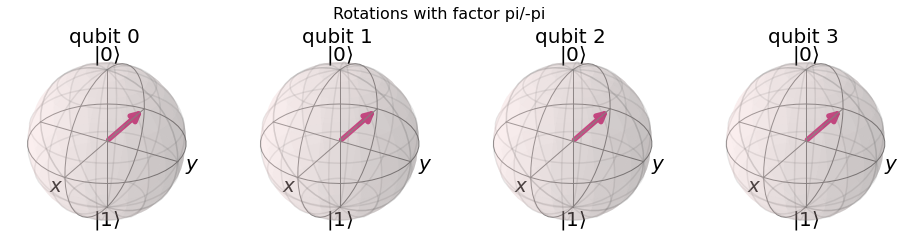

In [9]:
parameters = [2, -2, 2, -2]

circuit = create_circuit_for_rotations_with_parameters(parameters)
state = Statevector.from_instruction(circuit)
display(plot_bloch_multivector(state, title="Rotations with factor 2/-2", reverse_bits=False))

parameters = [3, -3, 3, -3]

circuit = create_circuit_for_rotations_with_parameters(parameters)
state = Statevector.from_instruction(circuit)
display(plot_bloch_multivector(state, title="Rotations with factor 3/-3", reverse_bits=False))

parameters = [0.5, -0.5, 0.5, -0.5]

circuit = create_circuit_for_rotations_with_parameters(parameters)
state = Statevector.from_instruction(circuit)
display(plot_bloch_multivector(state, title="Rotations with factor 0.5/-0.5", reverse_bits=False))


parameters = [np.pi, -np.pi, np.pi, -np.pi]

circuit = create_circuit_for_rotations_with_parameters(parameters)
state = Statevector.from_instruction(circuit)
display(plot_bloch_multivector(state, title="Rotations with factor pi/-pi", reverse_bits=False))

Observations show that factor _1_ cannot translate to 45°, because a full 180° rotation is only possible using factor _pi_. So the factorsavaliable and usable to us are $n\pi$, where as $n \in (-1,1)$. So, what does entanglement do to the qubit state? To make it more descriptive, we will focus on using 90° rotations.

In [57]:
def compile_circuit_and_measure(circuit, shots=3000):
    simulator = QasmSimulator()
    compiled_circuit = transpile(circuit, simulator)
    job = simulator.run(compiled_circuit, shots=shots)
    result = job.result()
    counts = result.get_counts(circuit)
    return counts

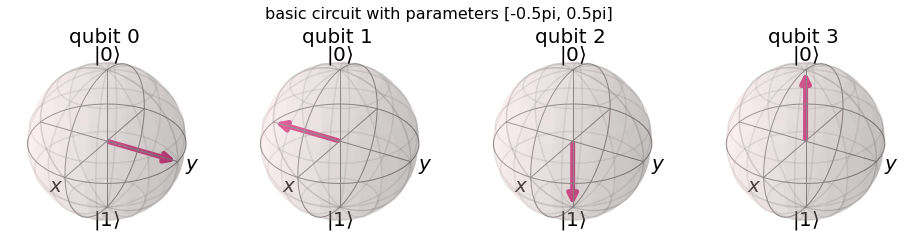

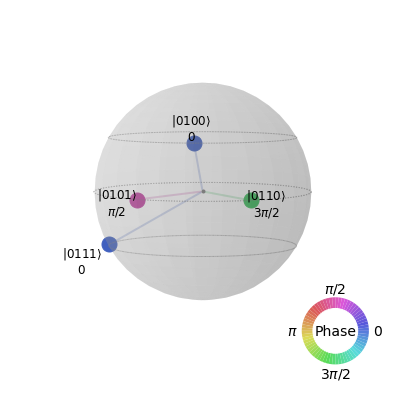

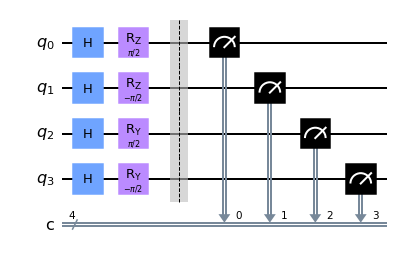

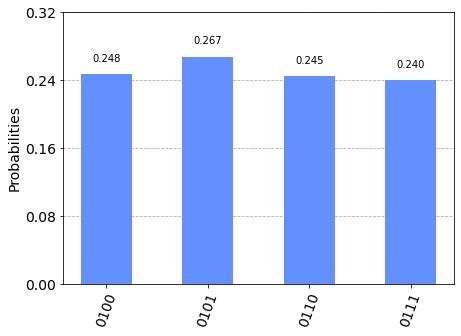

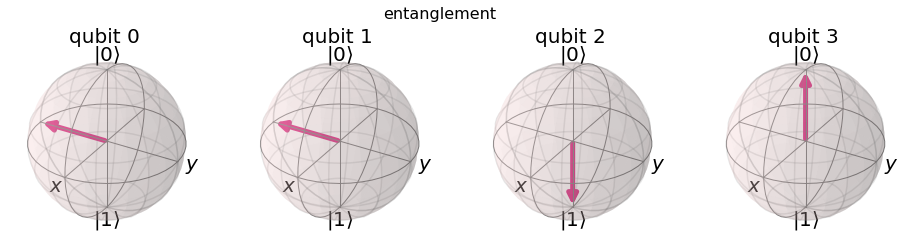

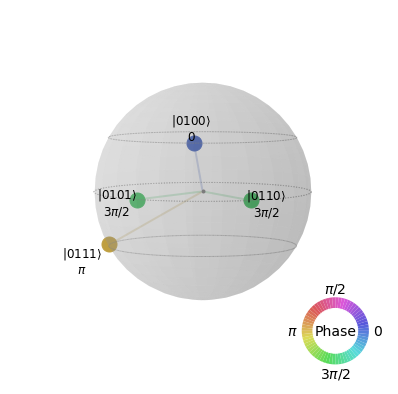

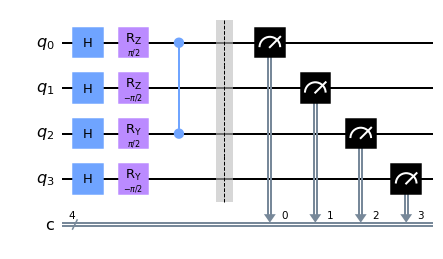

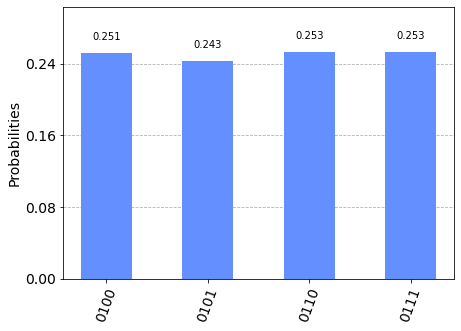

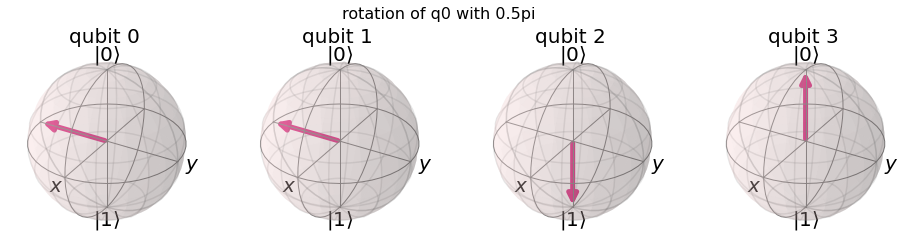

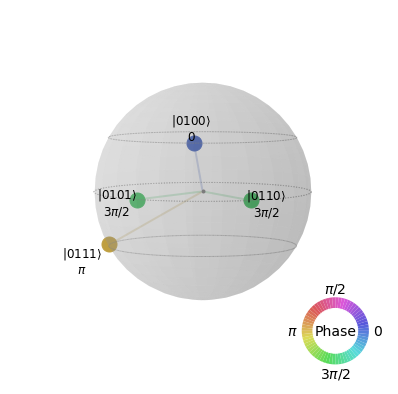

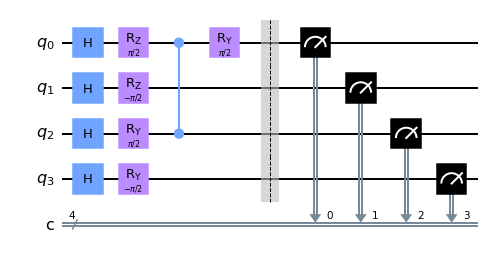

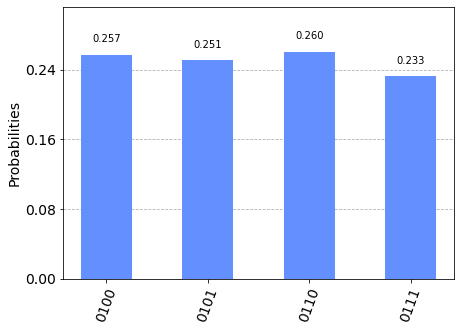

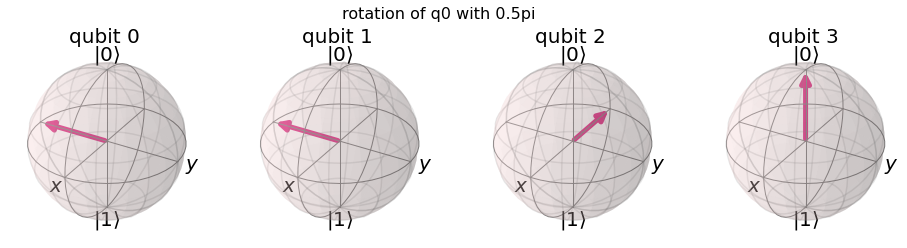

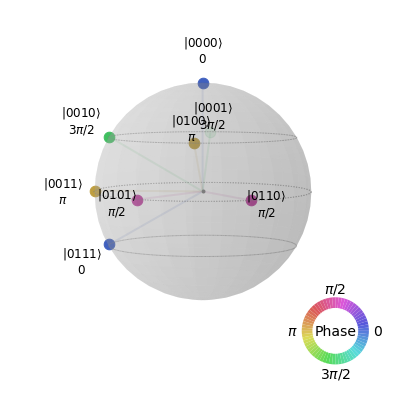

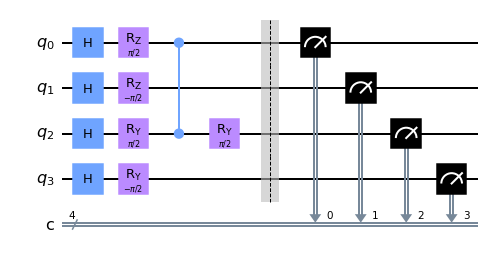

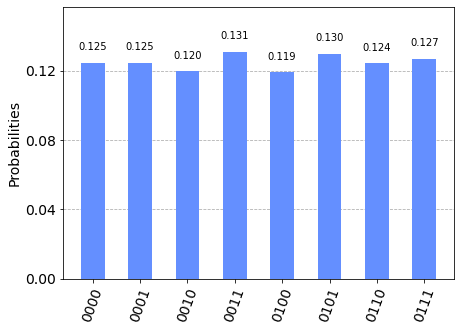

In [70]:
# First we initialize the same basic circuit as above
parameters = [0.5*np.pi, -0.5*np.pi, 0.5*np.pi, -0.5*np.pi]

# function to more easily call the bloch diagrams
def display_data(circuit, name):
    state = Statevector.from_instruction(circuit)
    display(plot_bloch_multivector(state, title=name, reverse_bits=False))
    display(plot_state_qsphere(state, show_state_labels =True, show_state_phases = True))
    copy = circuit.copy()
    copy.barrier()
    copy.measure(range(4), range(4))
    display(copy.draw('mpl'))
    display(plot_histogram(compile_circuit_and_measure(copy)))
    

    

circuit = create_circuit_for_rotations_with_parameters(parameters)
display_data(circuit, "basic circuit with parameters [-0.5pi, 0.5pi]")
#We now entagle the first and the third qubit
circuit.cz(0,2)
copy = circuit.copy()
display_data(copy, "entanglement")
#now we apply the a rotation to 1 qubit of 0.5pi to se how it influences the states
cz = circuit.copy()
cz.ry(0.5*np.pi, 0)
display_data(cz, "rotation of q0 with 0.5pi")
#What if we apply the rotation to qubit 2 instead?
#now we apply the a rotation to 1 qubit of 0.5pi to se how it influences the states
cz = circuit.copy()
cz.ry(0.5*np.pi, 2)
display_data(cz, "rotation of q0 with 0.5pi")

## Observation of quantum classifiers

To further understand how to build quantum classifiers (we will now move away from calling them neural networks - whilst the abstract idea of what they do resembles what a classical NN would do, the circuit itself differs from a classical NN). First, we will see how a measurment collapses a rotation to what value.



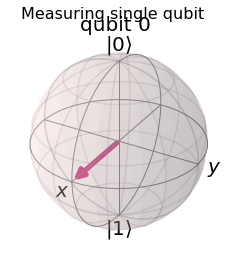

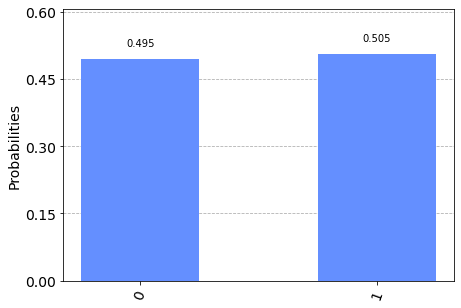

In [12]:
circuit = QuantumCircuit(1,1)
circuit.h(0)
state = Statevector.from_instruction(circuit)
display(plot_bloch_multivector(state, title="Measuring single qubit", reverse_bits=False))
circuit.measure(0,0)
display(plot_histogram(compile_circuit_and_measure(circuit)))

As expected, we have a collapse onto 0 and 1 with ~50% chance

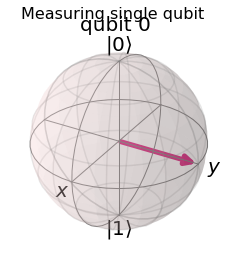

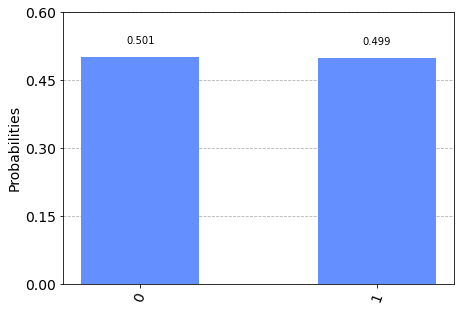

In [13]:
parameters = [0.5 * np.pi]

circuit = QuantumCircuit(1,1)
circuit.h(0)
circuit.rz(Parameter('i_0'),0)
circuit = circuit.bind_parameters(parameters)
state = Statevector.from_instruction(circuit)
display(plot_bloch_multivector(state, title="Measuring single qubit", reverse_bits=False))
circuit.measure(0,0)
display(plot_histogram(compile_circuit_and_measure(circuit)))

Again, we appear to have a rough distribution of 50% for the state 1 and 0.

### Conclusion

As we can see we can apply different rotations to manipulate the qubit state to our liking. Using the superpositon $\ket{+}$ and rotations around the z-axis we can manipulate the qubit to represent a variety of states. One purposal could be apply all parameters of the data (i.e. IRIS dataset) on one qubit and measure it. The single parameters should then throw the state over the 50% probability for measuring 0/1. 

## Experimenting with trainable weights

With this, we could create a quantum classifier. Using _PyTorch_ and _qiskit_ we will create very simple datasets and train the weights. The rotations we saw will be applied by normalized parameters (in our case, $x \in (0,1)$, as $x =\ -1 = 1$ in terms of the rotation). In our initial case, the normalization will not do anything as our values are already limited to $x \in \{0, 1\}$. Either way we will use still build a scaler that first normalizes to $[0, 1]$ and then expands it to $[-1,1]$

In [14]:
from sklearn.preprocessing import MinMaxScaler

def normalize_data(data):
    return MinMaxScaler().fit_transform(data) * 2 - 1

Text(0, 0.5, 'y')

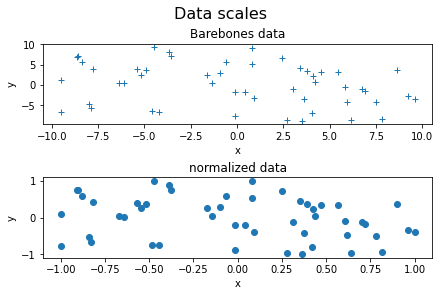

In [15]:
#Checking if the scaling works as intended
parameters = np.random.uniform(low=-(np.pi**2), high=np.pi**2, size=(50,2))
normalized_parameters = normalize_data(parameters)
fig, axs = plt.subplots(2, 1, constrained_layout=True)
axs[0].plot(parameters[:,0],parameters[:,1], '+')
axs[0].set_title('Barebones data')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
fig.suptitle('Data scales', fontsize=16)

axs[1].plot(normalized_parameters[:,0],normalized_parameters[:,1], 'o')
axs[1].set_title('normalized data')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')


We initiate the experiment by constructing a dataset to train the circuit on. Based on the _Tocchini_ design we will have one (ancilla) qubit to measure the output.

In [131]:
# set the random seed
np.random.seed(69069)

#          input 
data = [[0,0,0,0],
        [0,0,0,1],
        [0,0,1,0],
        [0,0,1,1],
        [0,1,0,0],
        [0,1,0,1],
        [0,1,1,1],
        [1,0,0,0],
        [1,0,0,1],
        [1,0,1,0],
        [1,0,1,1],
        [1,1,0,0],
        [1,1,0,1],
        [1,1,1,1]]

        
labels = [0,1,0,0,0,1,1,1,0,1,1,1,1,1]

# random weights to initialize circuit
weights = np.random.rand(4)


In [85]:
#funciton to create the circuit and apply the parameters
def build_circuit(n, parameters = []):
    circuit = QuantumCircuit(n+1,1)
    #add h-gates to all input qubits to allow for meaningfull rotation
    circuit.h(range(0,n))
    # add z rotation gates to each qubit
    for i in range(n):
        circuit.ry(Parameter('i_' + str(i)), i)
    #circuit.h(range(n))
    #circuit.x(range(n))
    circuit.cx(range(4),4)
    if len(parameters) > 0:
        circuit = circuit.bind_parameters(parameters)
        state = Statevector.from_instruction(circuit)
        display(plot_bloch_multivector(state, title="Qubits before measurment", reverse_bits=False))
    circuit.measure(n,0)
    return circuit
    

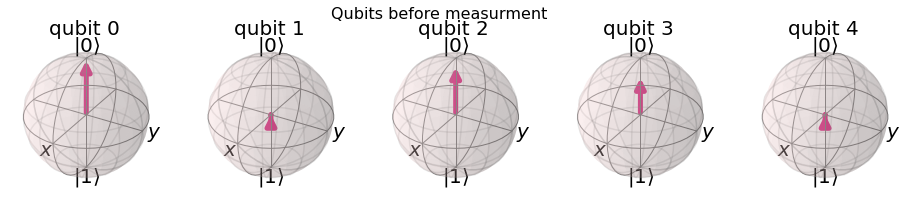

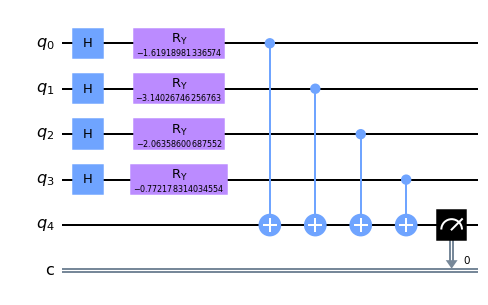

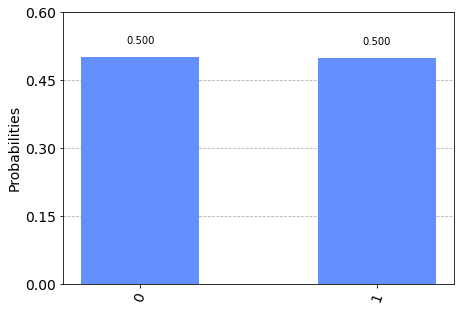

In [86]:
normalized_data = normalize_data(data)

circuit = build_circuit(4, np.multiply(weights, normalized_data[0])*np.pi)
display(circuit.draw('mpl'))
display(plot_histogram(compile_circuit_and_measure(circuit, shots=100000)))

As you can see there is an abudance of the weight parameters. This is because for the initial test we will apply the weight directly with $i$, so:

$$
d_x =\ i_x * w_x \text{where}\ i \in d_{inputs}\ \wedge\ w \in d_{weights}\ \wedge\ 0 \leq x < n
$$

Lets now build the learning part using _PyTorch_ and _Qiskit_, as taken from [here](https://qiskit.org/textbook/ch-machine-learning/machine-learning-qiskit-pytorch.html)

In [87]:
import torch
from torch.autograd import Function
from torchvision import datasets, transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

import qiskit
from qiskit import transpile, assemble
from qiskit.visualization import *

In [179]:
# Concentrating on the first 100 samples
n_samples = len(data)
split = np.floor(n_samples * 0.8).astype(int)

training = {'data':[], 'label':[]}
training['data'] = data[:split]
training['label'] = labels[:split]

In [180]:
testing = {'data':[],'label':[]}
testing['data'] = data[split:]
testing['label'] = labels[split:]

In [173]:
class QuantumCircuit:
    """ 
    This class provides a simple interface for interaction 
    with the quantum circuit 
    """
    
    def __init__(self, n_qubits, backend, shots):
        # --- Circuit definition ---
        self._circuit = qiskit.QuantumCircuit(n_qubits+1,1)
        all_qubits = [i for i in range(n_qubits+1)]
        self.theta = [qiskit.circuit.Parameter('i_' + str(i)) for i in range(n_qubits)]
        
        self._circuit.h(all_qubits)
        self._circuit.barrier()
        for i in range(n_qubits):
            self._circuit.ry(self.theta[i], i)
        
        self._circuit.cy(range(n_qubits), n_qubits)
        self._circuit.measure(n_qubits,0)
        # ---------------------------

        self.backend = backend
        self.shots = shots
    
    def run(self, thetas):
        t_qc = transpile(self._circuit,
                         self.backend)
        qobj = assemble(t_qc,
                        shots=self.shots,
                        parameter_binds = [{self.theta: theta} for theta in thetas])
        job = self.backend.run(qobj)
        result = job.result().get_counts()
        
        counts = np.array(list(result.values()))
        states = np.array(list(result.keys())).astype(float)
        
        # Compute probabilities for each state
        probabilities = counts / self.shots
        # Get state expectation
        expectation = np.sum(states * probabilities)
        
        return np.array([expectation])

In [174]:
simulator = qiskit.Aer.get_backend('aer_simulator')

circuit = QuantumCircuit(4, simulator, 100)
circuit._circuit.draw()

┌───┐ ░ ┌─────────┐                       
q_0: ┤ H ├─░─┤ Ry(i_0) ├──■────────────────────
     ├───┤ ░ ├─────────┤  │                    
q_1: ┤ H ├─░─┤ Ry(i_1) ├──┼────■───────────────
     ├───┤ ░ ├─────────┤  │    │               
q_2: ┤ H ├─░─┤ Ry(i_2) ├──┼────┼────■──────────
     ├───┤ ░ ├─────────┤  │    │    │          
q_3: ┤ H ├─░─┤ Ry(i_3) ├──┼────┼────┼────■─────
     ├───┤ ░ └─────────┘┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┐
q_4: ┤ H ├─░────────────┤ Y ├┤ Y ├┤ Y ├┤ Y ├┤M├
     └───┘ ░            └───┘└───┘└───┘└───┘└╥┘
c: 1/════════════════════════════════════════╩═
                                             0

In [175]:
class HybridFunction(Function):
    """ Hybrid quantum - classical function definition """
    
    @staticmethod
    def forward(ctx, input, quantum_circuit, shift):
        """ Forward pass computation """
        ctx.shift = shift
        ctx.quantum_circuit = quantum_circuit

        expectation_z = ctx.quantum_circuit.run(input[0].tolist())
        result = torch.tensor([expectation_z])
        ctx.save_for_backward(input, result)

        return result
        
    @staticmethod
    def backward(ctx, grad_output):
        """ Backward pass computation """
        input, expectation_z = ctx.saved_tensors
        input_list = np.array(input.tolist())
        
        shift_right = input_list + np.ones(input_list.shape) * ctx.shift
        shift_left = input_list - np.ones(input_list.shape) * ctx.shift
        
        gradients = []
        for i in range(len(input_list)):
            expectation_right = ctx.quantum_circuit.run(shift_right[i])
            expectation_left  = ctx.quantum_circuit.run(shift_left[i])
            
            gradient = torch.tensor([expectation_right]) - torch.tensor([expectation_left])
            gradients.append(gradient)
        gradients = np.array([gradients]).T
        return torch.tensor([gradients]).float() * grad_output.float(), None, None

class Hybrid(nn.Module):
    """ Hybrid quantum - classical layer definition """
    
    def __init__(self, backend, shots, shift):
        super(Hybrid, self).__init__()
        self.quantum_circuit = QuantumCircuit(1, backend, shots)
        self.shift = shift
        
    def forward(self, input):
        return HybridFunction.apply(input, self.quantum_circuit, self.shift)

In [176]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.dropout = nn.Dropout2d()
        self.fc1 = nn.Linear(256, 64)
        self.fc2 = nn.Linear(64, 1)
        self.hybrid = Hybrid(qiskit.Aer.get_backend('aer_simulator'), 100, np.pi / 2)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = self.dropout(x)
        x = x.view(1, -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.hybrid(x)
        return torch.cat((x, 1 - x), -1)

In [186]:
model = Net()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.NLLLoss()

epochs = 20
loss_list = []

model.train()
for epoch in range(epochs):
    total_loss = []
    for i, val in enumerate(training['data']):
        optimizer.zero_grad()
        # Forward pass
        output = model(data)
        # Calculating loss
        loss = loss_func(output, target)
        # Backward pass
        loss.backward()
        # Optimize the weights
        optimizer.step()
        
        total_loss.append(loss.item())
    loss_list.append(sum(total_loss)/len(total_loss))
    print('Training [{:.0f}%]\tLoss: {:.4f}'.format(
        100. * (epoch + 1) / epochs, loss_list[-1]))

ValueError: too many values to unpack (expected 2)

Text(0, 0.5, 'Neg Log Likelihood Loss')

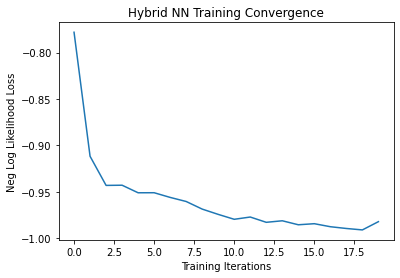

In [115]:
plt.plot(loss_list)
plt.title('Hybrid NN Training Convergence')
plt.xlabel('Training Iterations')
plt.ylabel('Neg Log Likelihood Loss')

In [118]:
model.eval()
with torch.no_grad():
    
    correct = 0
    for batch_idx, (data, target) in enumerate(test_loader):
        output = model(data)
        
        pred = output.argmax(dim=1, keepdim=True) 
        correct += pred.eq(target.view_as(pred)).sum().item()
        
        loss = loss_func(output, target)
        total_loss.append(loss.item())
        
    print('Performance on test data:\n\tLoss: {:.4f}\n\tAccuracy: {:.1f}%'.format(
        sum(total_loss) / len(total_loss),
        correct / len(test_loader) * 100)
        )

Performance on test data:
	Loss: -0.9759
	Accuracy: 100.0%
